In [339]:
from datetime import datetime,date
import numpy as np

datanyc=pd.read_csv('/Users/nayyar/Downloads/yellow_tripdata_2016-01.csv')


In [340]:
# Making column for Days of Week
datanyc['day']=datanyc['tpep_pickup_datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%A'))
datanyc['trip']=np.where(datanyc['trip_distance']>=0, 1, 0)
datanyc.groupby(by=['day'])['trip'].sum()

day
Friday       1972597
Monday       1282390
Saturday     1644057
Sunday       1555093
Thursday     1544347
Tuesday      1423483
Wednesday    1484891
Name: trip, dtype: int32

In [341]:


b_longitude_l=datanyc['pickup_longitude'] <= -73.840
b_longitude_u=datanyc['pickup_longitude'] > -74.047
b_latitude_l=datanyc['pickup_latitude'] >= 40.569
b_latitude_u=datanyc['pickup_latitude'] < 40.737
#queens
#40.749321, -73.958403
#40.567706, -73.825326
#40.594647, -73.742110
#40.807036, -73.813178
#40.633219, -73.750006
#40.749321, -73.732840
#40.805477, -73.785712
q_longitude_l=datanyc['pickup_longitude'] <= -73.742
q_longitude_u=datanyc['pickup_longitude'] > -73.958
q_latitude_l=datanyc['pickup_latitude'] >= 40.567
q_latitude_u=datanyc['pickup_latitude'] < 40.807
q1_longitude_l=datanyc['pickup_longitude'] <= -73.732
q1_longitude_u=datanyc['pickup_longitude'] > -73.813
q1_latitude_l=datanyc['pickup_latitude'] >= 40.633
q1_latitude_u=datanyc['pickup_latitude'] < 40.807
#bronx
#40.837031, -73.772276
#40.883769, -73.935698
#40.920617, -73.922652
#40.872866, -73.748930

#40.872347, -73.908232
#40.812610, -73.939818
#40.841186, -73.797682
#40.779341, -73.855361
br_longitude_l=datanyc['pickup_longitude'] <= -73.797
br_longitude_u=datanyc['pickup_longitude'] > -73.939
br_latitude_l=datanyc['pickup_latitude'] >= 40.779
br_latitude_u=datanyc['pickup_latitude'] < 40.872

br1_longitude_l=datanyc['pickup_longitude'] <= -73.922
br1_longitude_u=datanyc['pickup_longitude'] > -73.748
br1_latitude_l=datanyc['pickup_latitude'] >= 40.837
br1_latitude_u=datanyc['pickup_latitude'] < 40.920

datanyc[b_longitude_l & b_longitude_u & b_latitude_l & b_latitude_u].shape
datanyc[(q_longitude_l & q_longitude_u & q_latitude_l & q_latitude_u )|( q1_longitude_l & q1_longitude_u & q1_latitude_l & q1_latitude_u)].shape
datanyc[(br_longitude_l & br_longitude_u & br_latitude_l & br_latitude_u )|( br1_longitude_l & br1_longitude_u & br1_latitude_l & br1_latitude_u)].shape

(35402, 21)

In [342]:
brooklyn=pd.DataFrame(data=datanyc[b_longitude_l & b_longitude_u & b_latitude_l & b_latitude_u].groupby(by=['day'])['trip'].sum()).reset_index()
bronx.head()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = brooklyn['day'].map(mapping)    
brooklyn = brooklyn.iloc[key.argsort()]
brooklyn


,day,trip
1,Monday,238105
5,Tuesday,264653
6,Wednesday,287994
4,Thursday,306976
0,Friday,437098
2,Saturday,437340
3,Sunday,395401


In [343]:
queens=pd.DataFrame(data=datanyc[(q_longitude_l & q_longitude_u & q_latitude_l & q_latitude_u )|( q1_longitude_l & q1_longitude_u & q1_latitude_l & q1_latitude_u)].groupby(by=['day'])['trip'].sum()).reset_index()
queens.head()
key = queens['day'].map(mapping)
queens = queens.iloc[key.argsort()]
queens


,day,trip
1,Monday,223485
5,Tuesday,225757
6,Wednesday,221511
4,Thursday,226207
0,Friday,298536
2,Saturday,226984
3,Sunday,243380


In [344]:
bronx=pd.DataFrame(data=datanyc[(br_longitude_l & br_longitude_u & br_latitude_l & br_latitude_u )|( br1_longitude_l & br1_longitude_u & br1_latitude_l & br1_latitude_u)].groupby(by=['day'])['trip'].sum()).reset_index()
bronx.head()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = bronx['day'].map(mapping)
bronx = bronx.iloc[key.argsort()]
bronx

,day,trip
1,Monday,3969
5,Tuesday,4057
6,Wednesday,3906
4,Thursday,3882
0,Friday,8184
2,Saturday,5636
3,Sunday,5768


In [345]:
max_brook= brooklyn['trip'].max()
brook_norm=(brooklyn['trip']/max_brook) *100
max_queens= queens['trip'].max()
queens_norm=(queens['trip']/max_queens) *100
max_bronx= bronx['trip'].max()
bronx_norm=(bronx['trip']/max_bronx) *100
norm=pd.DataFrame(data=brooklyn['day'])
norm['Brooklyn']=brook_norm
norm['Queens']=queens_norm
norm['Bronx']=bronx_norm
norm

,day,Brooklyn,Queens,Bronx
1,Monday,54.443911,74.860318,48.497067
5,Tuesday,60.514245,75.621366,49.572336
6,Wednesday,65.851283,74.199092,47.727273
4,Thursday,70.191613,75.772101,47.434018
0,Friday,99.944665,100.000000,100.000000
2,Saturday,100.000000,76.032371,68.866080
3,Sunday,90.410436,81.524506,70.478983


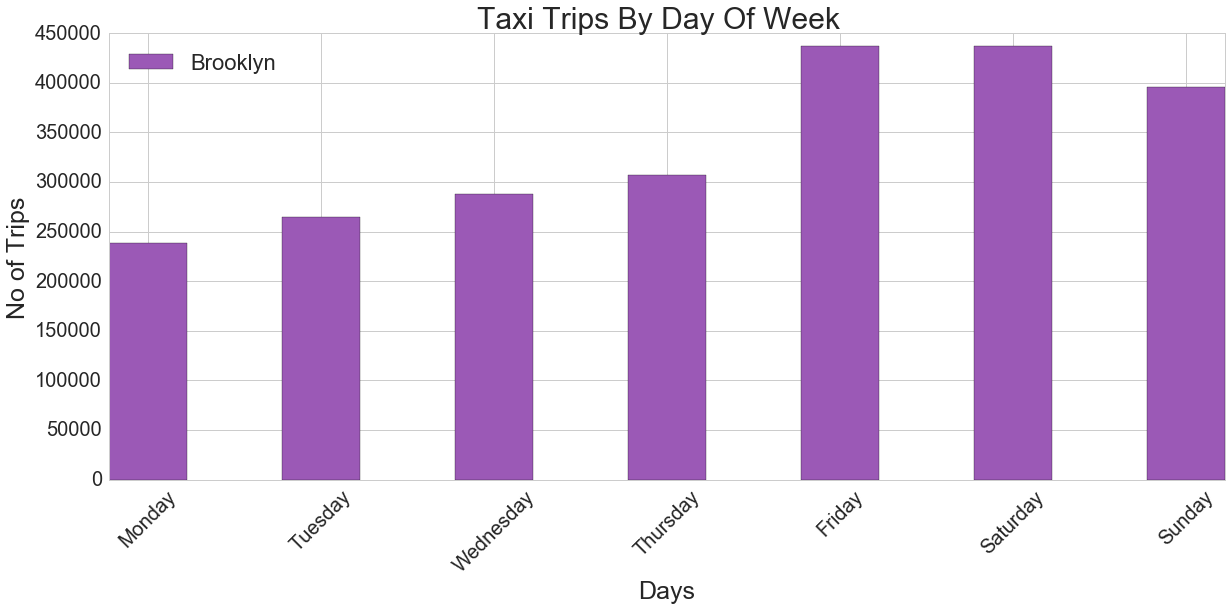

In [355]:

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
pl.subplots(figsize=(20,8))
x = [0,1,2,3,4,5,6]
xTicks = brooklyn['day']
y =brooklyn['trip']
pl.xticks(x, xTicks)
pl.xticks(range(7), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
p=pl.bar(X,y,color="#9b59b6",width = 0.45,label='Brooklyn',align='center')
pl.yticks(size=20)
pl.xlabel('Days', size=25)
pl.ylabel('No of Trips', size=25)
pl.legend(loc=2,prop={'size':22})
pl.title('Taxi Trips By Day Of Week  ', size=30)
pl.savefig("Analysis_1_brooklyn.jpeg", bbox_inches='tight')

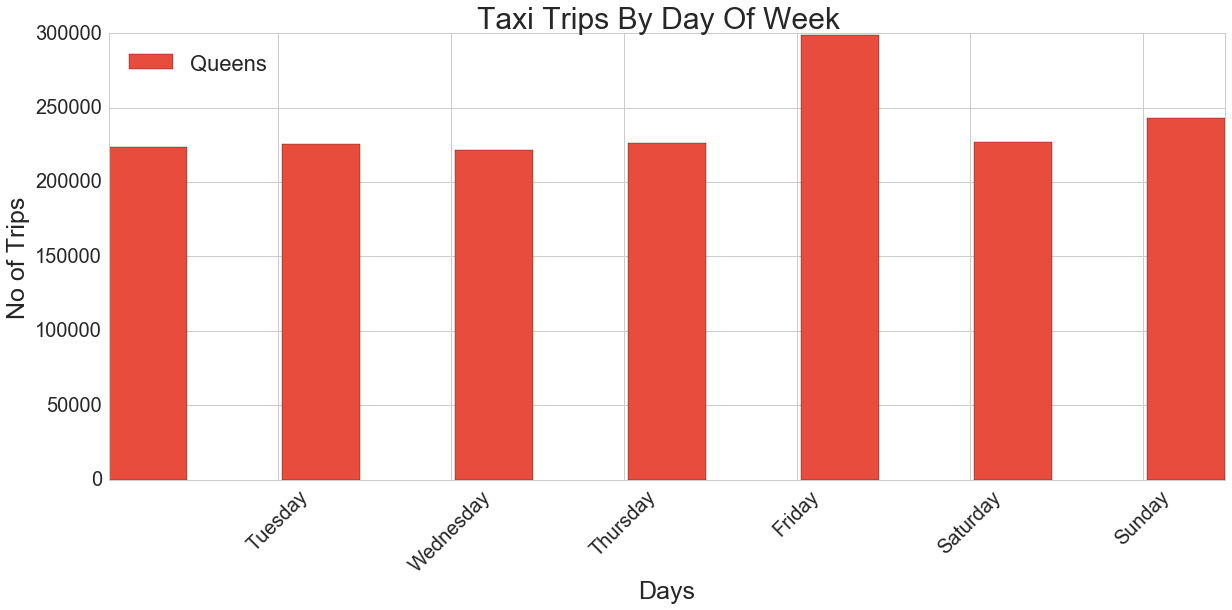

In [354]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
pl.subplots(figsize=(20,8))
x = [0,1,2,3,4,5,6]
xTicks = queens['day']
y =queens['trip']
pl.xticks(x, xTicks)
pl.xticks(range(7), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
p=pl.bar(X+0.25,y,color="#e74c3c", width = 0.45,label='Queens',align='center')
pl.yticks(size=20)
pl.xlabel('Days', size=25)
pl.ylabel('No of Trips', size=25)
pl.legend(loc=2,prop={'size':22})
pl.title('Taxi Trips By Day Of Week  ', size=30)
pl.savefig("Analysis_1_queens.jpeg", bbox_inches='tight')

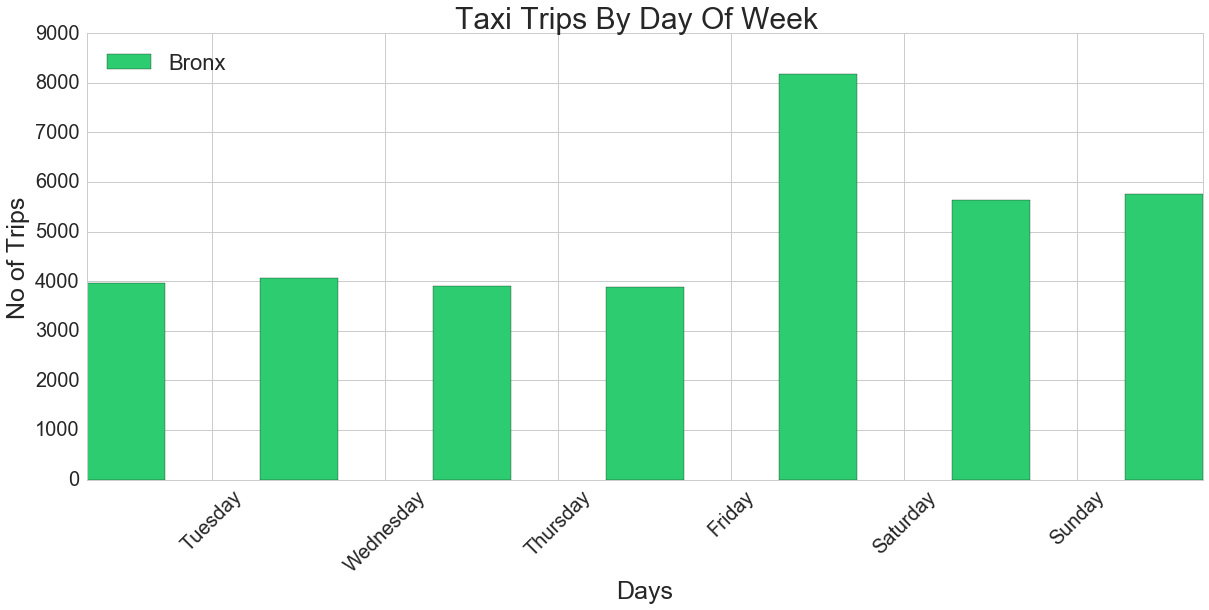

In [353]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
pl.subplots(figsize=(20,8))
x = [0,1,2,3,4,5,6]
xTicks = bronx['day']
y =bronx['trip']
pl.xticks(x, xTicks)
pl.xticks(range(7), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
p=pl.bar(X+0.5,y,color="#2ecc71", width = 0.45,label='Bronx',align='center')
pl.yticks(size=20)
pl.xlabel('Days', size=25)
pl.ylabel('No of Trips', size=25)
pl.legend(loc=2,prop={'size':22})
pl.title('Taxi Trips By Day Of Week  ', size=30)
pl.savefig("Analysis_1_bronx.jpeg", bbox_inches='tight')

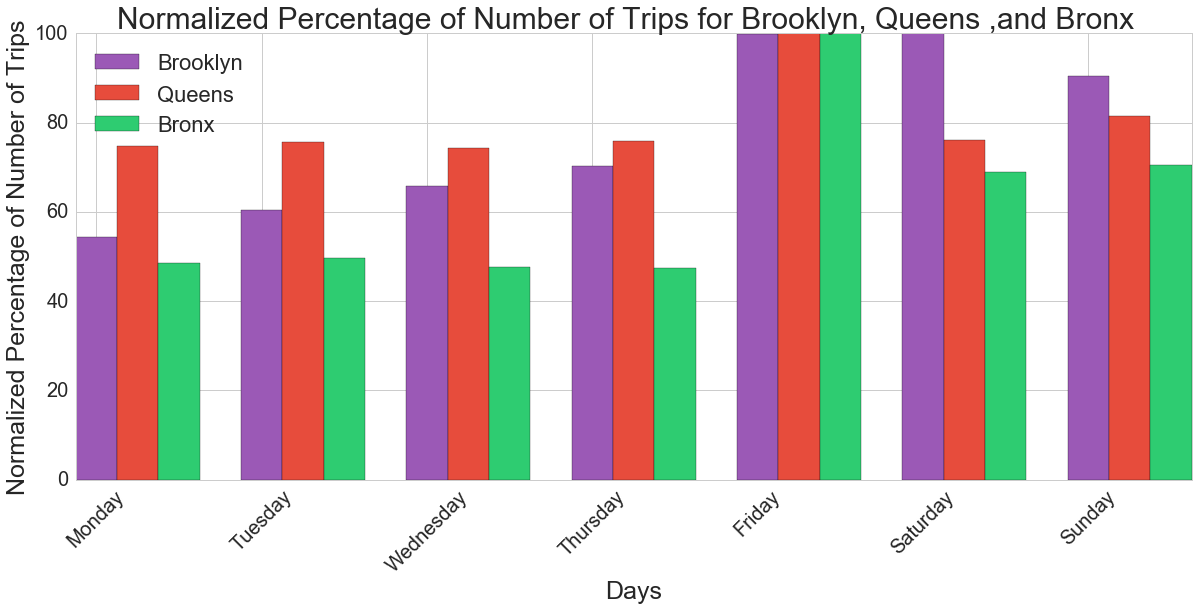

In [349]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
plt.subplots(figsize=(20,8))
x = [0,1,2,3,4,5,6]
xTicks = norm['day']
#y =norm['Brooklyn']
pl.xticks(x, xTicks)
pl.xticks(range(7), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
pl.yticks(size=20)
pl.xlabel('Days', size=25)
pl.ylabel('Normalized Percentage of Number of Trips', size=25)
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.palplot(sns.color_palette(flatui))
X = np.arange(7)
p=pl.bar(X,norm['Brooklyn'],color="#9b59b6",width = 0.25,label='Brooklyn',align='center')
p=pl.bar(X+0.25,norm['Queens'],color="#e74c3c", width = 0.25,label='Queens',align='center')
p=pl.bar(X+0.5,norm['Bronx'],color="#2ecc71", width = 0.25,label='Bronx',align='center')
pl.legend(loc=2,prop={'size':22})
pl.title('Normalized Percentage of Number of Trips for Brooklyn, Queens ,and Bronx  ', size=30)
plt.savefig("Analysis_1.jpeg", bbox_inches='tight')